In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use('default') 

In [2]:
df_eventos = pd.read_csv('events.csv', low_memory =False)
df_eventos.head(5)

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Visitantes de Trocafone



In [3]:
residencia_eventos = df_eventos[['event','city','region','country']]
residencia_eventos.head()

,event,city,region,country
0,ad campaign hit,NaN,NaN,NaN
1,visited site,Camaragibe,Pernambuco,Brazil
2,viewed product,NaN,NaN,NaN
3,checkout,NaN,NaN,NaN
4,viewed product,NaN,NaN,NaN


Se puede observar que estos datos se registran cada vez que el sitio es visitado, entonces nos quedaremos solamente con aquellos eventos.

In [4]:
residencia_visitantes=residencia_eventos.loc[(residencia_eventos['event']=='visited site'),['city','region','country']]

In [5]:
residencia_visitantes['country'].value_counts().head()

Brazil           84308
Unknown           2313
United States      465
Argentina           94
Canada              35
Name: country, dtype: int64

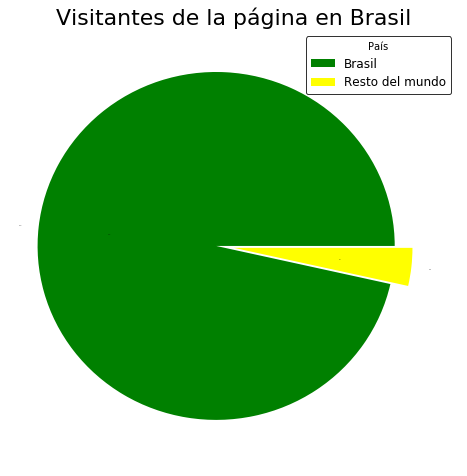

In [6]:
residencia_visitantes['Live in Brazil'] = (residencia_visitantes['country']=='Brazil')
visitantes_en_brasil = residencia_visitantes['Live in Brazil'].value_counts()
grafico_paises = visitantes_en_brasil.plot(kind='pie',autopct='%1.1f%%',figsize=(8,8),fontsize=0,colors=['green','yellow'],explode=(0.1, 0))
grafico_paises.set_title('Visitantes de la página en Brasil',fontsize = 22)
grafico_paises.set_ylabel('')
leyenda=plt.legend(['Brasil','Resto del mundo'],fontsize=12,title='País',frameon=True,facecolor='white',edgecolor='black')
leyenda.get_frame().set_linewidth(1.0)

Se puede observar en el gráfico superior que por una mayoría abrumadora, los visitantes del sitio web son residentes de Brasil, dejando una mínima parte para el resto del mundo. Dentro de estos últimos los países que se destacan son Estados Unidos y Argentina, en ese orden.

In [7]:
df_eventos['vive en Brasil'] = df_eventos['country']=='Brazil'
personas_en_Brasil = df_eventos[['person','event','city','region']]

In [8]:
personas_en_Brasil_copia =df_eventos[['person','vive en Brasil']]
personas_en_Brasil_copia = personas_en_Brasil_copia.loc[personas_en_Brasil_copia['vive en Brasil']==True]

In [9]:
personas_en_Brasil = pd.merge(personas_en_Brasil,personas_en_Brasil_copia, how='inner', on='person')
personas_en_Brasil.head()

,person,event,city,region,vive en Brasil
0,0004b0a2,ad campaign hit,NaN,NaN,True
1,0004b0a2,visited site,Camaragibe,Pernambuco,True
2,0004b0a2,viewed product,NaN,NaN,True
3,0004b0a2,checkout,NaN,NaN,True
4,0006a21a,viewed product,NaN,NaN,True


In [10]:
cant_eventos_Brasil = personas_en_Brasil['event'].value_counts()

Text(0.5,0,'Cantidad(log)')

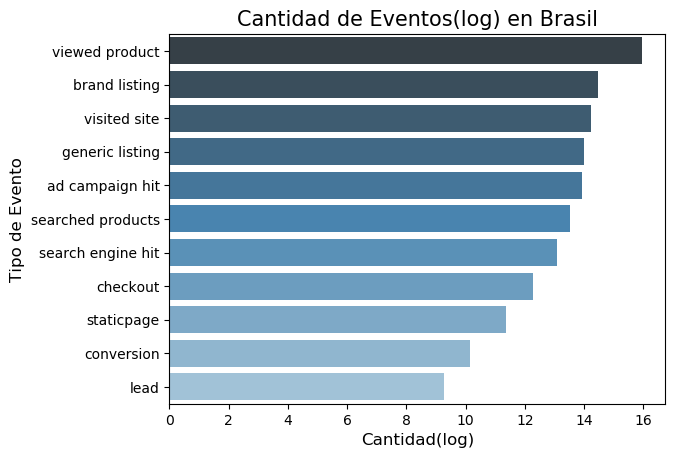

In [32]:
grafico_eventos_pais =sns.barplot(np.log(cant_eventos_Brasil.values),cant_eventos_Brasil.index,palette ='Blues_d')
grafico_eventos_pais.set_title("Cantidad de Eventos(log) en Brasil",fontsize=15)
grafico_eventos_pais.set_ylabel("Tipo de Evento",fontsize=12)
grafico_eventos_pais.set_xlabel("Cantidad(log)",fontsize=12)